In [31]:
from geopy.distance import geodesic
from metar import Metar
from utils.data_treatment import parse_wind_info, get_metar_features, get_voos_para_o_destino_no_mesmo_horario
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ImportError: cannot import name 'get_voos_para_o_destino_no_mesmo_horario' from 'utils.data_treatment' (/Users/valmirjunior/Documents/GitHub/legendary-umbrella/app/utils/data_treatment.py)

In [29]:
# Specify the file path or URL to load the CSV file
file_path = './../data/public.csv'

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)
df

,flightid,hora_ref,origem,destino,url_img_satelite,metaf,metar,prev_troca_cabeceira,troca_cabeceira_hora_anterior,espera
0,504a62621cd231d6ab67e674ce538cd3,2022-06-01T01:00:00Z,SBCF,SBFL,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBFL 010000Z 17009KT 140V200 9999 BKN030...,0,1,0.0
1,b0fd0f83644625ecc21f5261e8e5e347,2022-06-01T01:00:00Z,SBPA,SBFL,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBFL 010000Z 17009KT 140V200 9999 BKN030...,0,1,0.0
2,1210f0ca07ddca00d09a3e02d3b100d8,2022-06-01T01:00:00Z,SBSP,SBCF,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBCF 010000Z 12006KT CAVOK 21/14 Q1018=,0,0,0.0
3,b25032f34507cce285ee779446496568,2022-06-01T01:00:00Z,SBGR,SBCT,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBCT 010000Z 10006KT 7000 -RA BKN004 OVC...,0,0,0.0
4,00762a9892ecba7c66d1d87800d38cac,2022-06-01T01:00:00Z,SBSP,SBSV,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBSV 010000Z 11008KT 9999 FEW023 27/21 Q...,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...
302394,8ca8c4d16e592d65cd25d341113aecdf,2023-05-31T23:00:00Z,SBCT,SBSP,http://satelite.cptec.inpe.br/repositoriogoes/...,METAF SBSP 312300Z 16004KT 2000 BR OVC033...,METAR SBSP 312200Z 20007KT 170V230 9999 SCT009...,0,0,NaN
302395,afde50d413c2374ab53cd3101332f9fc,2023-05-31T23:00:00Z,SBCT,SBKP,http://satelite.cptec.inpe.br/repositoriogoes/...,METAF SBKP 312300Z 11006KT 5000 BR SCT024...,METAR SBKP 312200Z 20004KT 9999 OVC035 18/16 Q...,0,0,NaN
302396,faeb2f6e744c606aee9e819ea1d62e6b,2023-05-31T23:00:00Z,SBGL,SBKP,http://satelite.cptec.inpe.br/repositoriogoes/...,METAF SBKP 312300Z 11006KT 5000 BR SCT024...,METAR SBKP 312200Z 20004KT 9999 OVC035 18/16 Q...,0,0,NaN
302397,3992d063be713b35d3bf46b79853880e,2023-05-31T23:00:00Z,SBKP,SBRJ,http://satelite.cptec.inpe.br/repositoriogoes/...,METAF SBRJ 312300Z 08012KT 9999 FEW033 ...,METAR SBRJ 312200Z 31004KT 240V340 9999 FEW007...,0,0,NaN


In [3]:
obs = Metar.Metar(df['metar'].iloc[0])
print(obs.string())

station: SBFL
type: routine report (automatic report)
time: Mon Apr  1 00:00:00 2024
temperature: 14.0 C
dew point: 7.0 C
wind: SE to SSW at 9 knots
visibility: greater than 10000 meters
pressure: 1020.0 mb
sky: broken clouds at 3000 feet
METAR: METAR SBFL 010000Z 17009KT 140V200 9999 BKN030 14/07 Q1020=


In [4]:
get_metar_features(obs)

{'time': 'Mon Apr  1 00:00:00 2024',
 'temperature': '14.0',
 'dew_point': '7.0',
 'wind_direction': 'SE to SSW',
 'wind_velocity': 9.0,
 'peak_wind': None,
 'wind_shift': None,
 'visibility': '10000',
 'runway_visual_range': None,
 'pressure': '1020.0',
 'present_weather': None,
 'few_cloud_height': None,
 'broken_cloud_height': '3000',
 'overcast_cloud_height': None,
 'scattered_cloud_height': None,
 'max_temp_6hr': None,
 'min_temp_6hr': None,
 'max_temp_24hr': None,
 'min_temp_24hr': None,
 'precip_1hr': None,
 'precip_3hr': None,
 'precip_6hr': None,
 'precip_24hr': None,
 'ice_accretion_1hr': None,
 'ice_accretion_3hr': None,
 'ice_accretion_6hr': None}

In [32]:
for index, row in df.iterrows():
    aeroporto_destino = row['destino']

    quantidade_de_voos_para_o_mesmo_destino = get_voos_para_o_destino_no_mesmo_horario(aeroporto_destino, row['data'])

    df.at[index, 'quantidade_de_voo_para_o_mesmo_destino'] = quantidade_de_voos_para_o_mesmo_destino

df

NameError: name 'get_voos_para_o_destino_no_mesmo_horario' is not defined

In [5]:
# Verificar valores ausentes em cada coluna
missing_values = df.isnull().sum()

# Exibir as colunas com valores ausentes, se houver
print("Valores ausentes por coluna:")
print(missing_values[missing_values > 0])

Valores ausentes por coluna:
url_img_satelite      3733
metaf               146662
metar                 1629
espera               90720
dtype: int64


In [6]:
aeroportos_origem = df['origem'].unique()
aeroportos_destino = df['destino'].unique()

aeroportos_unicos = np.unique(np.concatenate((aeroportos_origem, aeroportos_destino), axis=None))

print("Aeroportos únicos:")
print(aeroportos_unicos)

Aeroportos únicos:
['SBBR' 'SBCF' 'SBCT' 'SBFL' 'SBGL' 'SBGR' 'SBKP' 'SBPA' 'SBRF' 'SBRJ'
 'SBSP' 'SBSV']


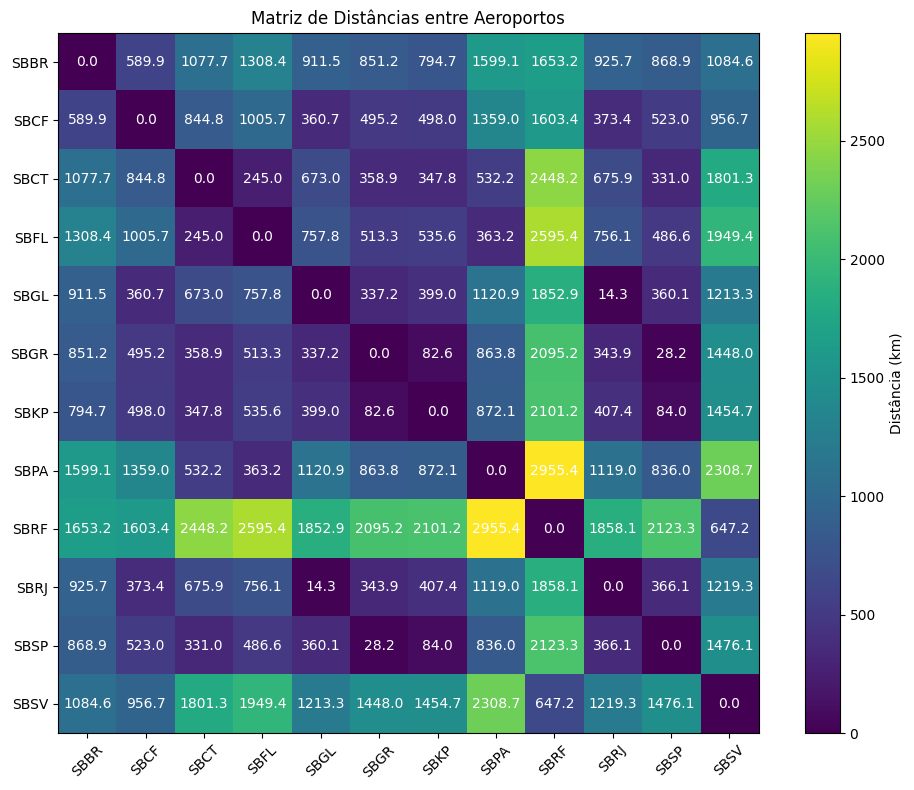

In [7]:
# Coordenadas dos aeroportos
aeroportos = {
    'SBBR': (-15.869167, -47.920833),  # Brasília
    'SBCF': (-19.624166, -43.971943),  # Confins
    'SBCT': (-25.531944, -49.173611),  # Curitiba
    'SBFL': (-27.670556, -48.547222),  # Florianópolis
    'SBGL': (-22.810556, -43.250556),  # Galeão (Rio de Janeiro)
    'SBGR': (-23.435556, -46.473056),  # Guarulhos (São Paulo)
    'SBKP': (-23.008889, -47.134444),  # Viracopos (Campinas)
    'SBPA': (-29.993889, -51.171389),  # Porto Alegre
    'SBRF': (-8.126389, -34.924167),   # Recife
    'SBRJ': (-22.910556, -43.163056),  # Santos Dumont (Rio de Janeiro)
    'SBSP': (-23.626111, -46.656389),  # Congonhas (São Paulo)
    'SBSV': (-12.908611, -38.331944)   # Salvador
}

# Função para calcular a distância entre dois aeroportos
def calcular_distancia(aeroporto1, aeroporto2):
    coords1 = aeroportos[aeroporto1]
    coords2 = aeroportos[aeroporto2]
    return geodesic(coords1, coords2).kilometers

# Criar uma matriz de distâncias
num_aeroportos = len(aeroportos)
matriz_distancias = np.zeros((num_aeroportos, num_aeroportos))

# Preencher a matriz com as distâncias
for i, aeroporto1 in enumerate(aeroportos):
    for j, aeroporto2 in enumerate(aeroportos):
        if i != j:
            distancia = calcular_distancia(aeroporto1, aeroporto2)
            matriz_distancias[i][j] = distancia

# Plotar a matriz com os valores
plt.figure(figsize=(10, 8))
plt.imshow(matriz_distancias, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Distância (km)')
for i in range(num_aeroportos):
    for j in range(num_aeroportos):
        plt.text(j, i, f'{matriz_distancias[i, j]:.1f}', ha='center', va='center', color='white')
plt.title('Matriz de Distâncias entre Aeroportos')
plt.xticks(np.arange(num_aeroportos), aeroportos.keys(), rotation=45)
plt.yticks(np.arange(num_aeroportos), aeroportos.keys())
plt.tight_layout()
plt.show()


In [8]:
dictMetafAndMetar = {}

# Iterar sobre os aeroportos únicos

for aeroporto in aeroportos_unicos:
    dictMetafAndMetar[aeroporto] = {}


print(dictMetafAndMetar)

'''
Interar sobre as linhas do DataFrame e fazer o seguinte

1 - Verificar se o metaf da linha esta presente, caso esteja
    1.1 - Verificar se o horario da linha esta presente no aeroporto de origem da linha no dicionario
        1.1.1 - Se nao estiver presente no dicionario, adicionar o metaf mas dentro de um objeto com nome metaf no horario ao aeroporto de origem da linha

2 - Verificar se o metar da linha esta presente, caso esteja
    2.1 - Verificar se o horario da linha esta presente no aeroporto de destino da linha no dicionario
        2.1.1 - Se nao estiver presente no dicionario, adicionar o metar mas dentro de um objeto com nome metar no horario ao aeroporto de destino do dicionario
'''

for index, row in df.iterrows():
    aeroporto_destino = row['destino']
    horario_ref = row['hora_ref']  # Horário de referência da linha

    # Verificando se há dados METAF disponíveis
    if not pd.isnull(row['metaf']):
        if horario_ref not in dictMetafAndMetar[aeroporto_destino]:
            dictMetafAndMetar[aeroporto_destino][horario_ref] = {}
        dictMetafAndMetar[aeroporto_destino][horario_ref]['metaf'] = row['metaf']

    # Verificando se há dados METAR disponíveis
    if not pd.isnull(row['metar']):
        # Aqui, usamos o horário de referência para o aeroporto de destino
        if horario_ref not in dictMetafAndMetar[aeroporto_destino]:
            dictMetafAndMetar[aeroporto_destino][horario_ref] = {}
        dictMetafAndMetar[aeroporto_destino][horario_ref]['metar'] = row['metar']



import json

# Seu código para criar dictMetafAndMetar ...

# Salvar o dicionário em um arquivo JSON
with open('dictMetafAndMetar.json', 'w') as json_file:
    json.dump(dictMetafAndMetar, json_file, indent=4)

print("Dicionário de aeroportos salvo com sucesso em dictMetafAndMetar.json")


{'SBBR': {}, 'SBCF': {}, 'SBCT': {}, 'SBFL': {}, 'SBGL': {}, 'SBGR': {}, 'SBKP': {}, 'SBPA': {}, 'SBRF': {}, 'SBRJ': {}, 'SBSP': {}, 'SBSV': {}}
Dicionário de aeroportos salvo com sucesso em dictMetafAndMetar.json


In [9]:
DISTANCIA_MAXIMA = 250

def calcular_aeroporto_proximos(origem,matriz_distancias):
    aeroportos_proximos = []
    for i, aeroporto in enumerate(aeroportos_unicos):
        if aeroporto != origem:
            distancia = matriz_distancias[list(aeroportos.keys()).index(origem)][i]
            if distancia <= DISTANCIA_MAXIMA:
                aeroportos_proximos.append((aeroporto, distancia))

    aeroportos_proximos.sort(key=lambda x: x[1])
    return aeroportos_proximos

In [12]:
for index, row in df.iterrows():
    horario = row['hora_ref']

    # Converter a string em um objeto datetime
    data_hora = datetime.fromisoformat(horario)

    # Remover uma hora
    data_hora_menos_uma_hora = data_hora - timedelta(hours=1)
    # Adicionar uma hora
    data_hora_mais_uma_hora = data_hora + timedelta(hours=1)

    # Converter de volta para string
    data_hora_menos_uma_hora_str = data_hora_menos_uma_hora.isoformat()
    data_hora_mais_uma_hora_str = data_hora_mais_uma_hora.isoformat()

    if pd.isna(row['metaf']):
        new_metaf = None
        aeroporto = row['destino']

        if horario in dictMetafAndMetar[aeroporto]:
            if 'metaf' in dictMetafAndMetar[aeroporto][horario]:
                new_metaf = dictMetafAndMetar[aeroporto][horario]['metaf']
            elif 'metar' in dictMetafAndMetar[aeroporto][horario]:
                new_metaf = dictMetafAndMetar[aeroporto][horario]['metar']
        else:
            if data_hora_menos_uma_hora_str in dictMetafAndMetar[aeroporto]:
                if 'metaf' in dictMetafAndMetar[aeroporto][data_hora_menos_uma_hora_str]:
                    new_metaf = dictMetafAndMetar[aeroporto][data_hora_menos_uma_hora_str]['metaf']
                elif 'metar' in dictMetafAndMetar[aeroporto][data_hora_menos_uma_hora_str]:
                    new_metaf = dictMetafAndMetar[aeroporto][data_hora_menos_uma_hora_str]['metar']
            elif data_hora_mais_uma_hora_str in dictMetafAndMetar[aeroporto]:
                if 'metaf' in dictMetafAndMetar[aeroporto][data_hora_mais_uma_hora_str]:
                    new_metaf = dictMetafAndMetar[aeroporto][data_hora_mais_uma_hora_str]['metaf']
                elif 'metar' in dictMetafAndMetar[aeroporto][data_hora_mais_uma_hora_str]:
                    new_metaf = dictMetafAndMetar[aeroporto][data_hora_mais_uma_hora_str]['metar']
            else:
                aeroportos_proximo = calcular_aeroporto_proximos(aeroporto, matriz_distancias)
                if len(aeroportos_proximo) > 0:
                    # Verifica se encontra o metaf ou metar mais próximo
                    for aeroporto_proximo, _ in aeroportos_proximo:
                        if horario in dictMetafAndMetar[aeroporto_proximo]:
                            if 'metaf' in dictMetafAndMetar[aeroporto_proximo][horario]:
                                new_metaf = dictMetafAndMetar[aeroporto_proximo][horario]['metaf']
                            elif 'metar' in dictMetafAndMetar[aeroporto_proximo][horario]:
                                new_metaf = dictMetafAndMetar[aeroporto_proximo][horario]['metar']
                            break
        df.at[index, 'metaf'] = new_metaf


    if pd.isna(row['metar']):
        new_metar = None
        aeroporto = row['destino']

        if horario in dictMetafAndMetar[aeroporto]:
            if 'metar' in dictMetafAndMetar[aeroporto][horario]:
                new_metar = dictMetafAndMetar[aeroporto][horario]['metar']
            elif 'metaf' in dictMetafAndMetar[aeroporto][horario]:
                new_metar = dictMetafAndMetar[aeroporto][horario]['metaf']
        else:
            if data_hora_menos_uma_hora_str in dictMetafAndMetar[aeroporto]:
                if 'metar' in dictMetafAndMetar[aeroporto][data_hora_menos_uma_hora_str]:
                    new_metar = dictMetafAndMetar[aeroporto][data_hora_menos_uma_hora_str]['metar']
                elif 'metaf' in dictMetafAndMetar[aeroporto][data_hora_menos_uma_hora_str]:
                    new_metar = dictMetafAndMetar[aeroporto][data_hora_menos_uma_hora_str]['metaf']
            elif data_hora_mais_uma_hora_str in dictMetafAndMetar[aeroporto]:
                if 'metar' in dictMetafAndMetar[aeroporto][data_hora_mais_uma_hora_str]:
                    new_metar = dictMetafAndMetar[aeroporto][data_hora_mais_uma_hora_str]['metar']
                elif 'metaf' in dictMetafAndMetar[aeroporto][data_hora_mais_uma_hora_str]:
                    new_metar = dictMetafAndMetar[aeroporto][data_hora_mais_uma_hora_str]['metaf']
            else:
                aeroportos_proximo = calcular_aeroporto_proximos(aeroporto, matriz_distancias)
                if len(aeroportos_proximo) > 0:
                    # Verifica se encontra o metaf ou metar mais próximo
                    for aeroporto_proximo, _ in aeroportos_proximo:
                        if horario in dictMetafAndMetar[aeroporto_proximo]:
                            if 'metar' in dictMetafAndMetar[aeroporto_proximo][horario]:
                                new_metar = dictMetafAndMetar[aeroporto_proximo][horario]['metar']
                            elif 'metaf' in dictMetafAndMetar[aeroporto_proximo][horario]:
                                new_metar = dictMetafAndMetar[aeroporto_proximo][horario]['metaf']
                            break
        df.at[index, 'metar'] = new_metar

In [13]:
# Verificar valores ausentes em cada coluna
missing_values = df.isnull().sum()

# Exibir as colunas com valores ausentes, se houver
print("Valores ausentes por coluna:")
print(missing_values[missing_values > 0])

Valores ausentes por coluna:
url_img_satelite     3733
metaf                1221
metar                1221
espera              90720
dtype: int64


In [15]:
df.to_csv('data_imputado2.csv', index=False)

print("DataFrame salvo com sucesso em nome_do_arquivo.csv")

DataFrame salvo com sucesso em nome_do_arquivo.csv
